## Exemplo de ler e plotar os dados.

In [1]:
import gsw
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import style
from pandas import read_csv

style.use('dark_background')

In [2]:
lon, lat = -(70. + 59.59 / 60.), 36. + 40.03 / 60.
st61 = read_csv('Endeavor_Cruise-88_Station-61.csv', comment='#',
                header=1, index_col=0)

In [3]:
print(st61.head(5))

               t       S  sigma_theta    anom     geo  geo 10e-5
Pressure                                                        
0         25.698  35.221       23.296  457.24     NaN        NaN
1         25.698  35.221       23.296  457.28  457.26      0.046
10        26.763  36.106       23.658  423.15  440.22      0.396
20        26.678  36.106       23.658  423.66  423.41      0.423
30        26.676  36.107       23.659  423.98  423.82      0.424


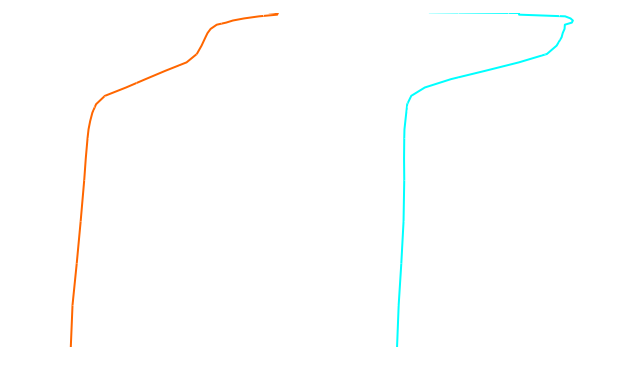

In [4]:
%matplotlib inline


kw = dict(linewidth=2)
fig, (ax0, ax1) = plt.subplots(ncols=2, sharey=True, figsize=(10, 6))
ax0.plot(st61['t'], st61.index, color='#FF6600', **kw)
ax0.set_ylabel(u"Pressão [dbar]")
ax0.set_xlabel(u"Temperatura [°C]")
ax0.grid()
ax0.invert_yaxis()

ax1.plot(st61['S'], st61.index, color='#00FFFF', **kw)
ax1.set_xlabel(r"Salinidade [g kg$^{-1}$]")
ax1.grid()

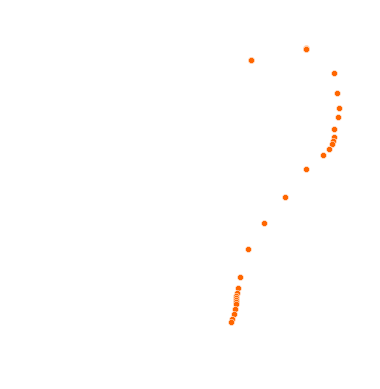

In [5]:
Te = np.arange(0, 32, 2)
Se = np.arange(32, 38.25, 0.25)

Sg, Tg = np.meshgrid(Se, Te)
cnt = np.arange(20, 34)

sigma_theta = gsw.sigma0_pt0_exact(Sg, Tg)

fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(st61['S'], st61['t'], marker='o', markeredgecolor='w', markerfacecolor='#FF6600', linestyle='none')
ax.set_ylabel(u"Temperatura \u00b0C")
ax.set_xlabel(r"Salinidade [g kg$^{-1}$]")

cs = ax.contour(Se, Te, sigma_theta, colors='white', levels=cnt)
ax.clabel(cs, fontsize=9, inline=1, fmt='%2.1f')
_ = ax.axis([31.8, 37.2, 0.0, 30.0])